In [3]:
from sklearn.metrics import mean_squared_error
y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]
print(mean_squared_error(y_true, y_pred) ** 0.5)

0.6123724356957945


In [4]:
import pandas as pd

# Load saved predictions
df_preds = pd.read_csv("outputs/batch_predictions.csv")
df_preds.head()


,Relative_Compactness,Surface_Area,Wall_Area,Roof_Area,Overall_Height,Orientation,Glazing_Area,Glazing_Area_Distribution,heating_load_prediction
0,0.98,514.5,294.0,110.25,7.0,2,0.1,3,24.40
1,0.75,637.1,318.5,122.50,3.5,4,0.4,5,26.05
2,0.82,553.5,318.5,122.50,7.0,3,0.3,2,29.05


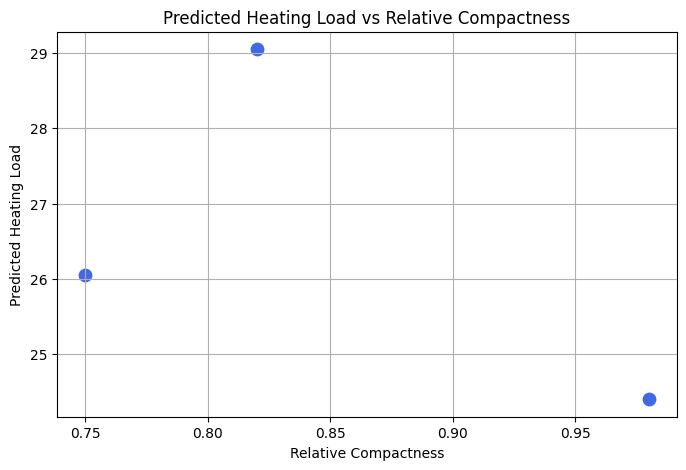

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df_preds["Relative_Compactness"], df_preds["heating_load_prediction"], color="royalblue", s=80)
plt.xlabel("Relative Compactness")
plt.ylabel("Predicted Heating Load")
plt.title("Predicted Heating Load vs Relative Compactness")
plt.grid(True)
plt.show()


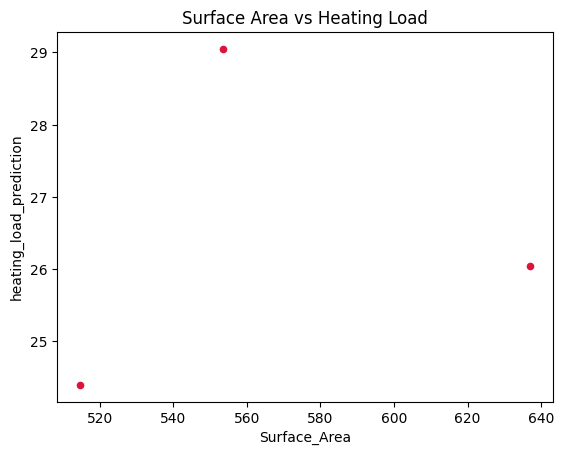

In [6]:
df_preds.plot(
    x="Surface_Area", 
    y="heating_load_prediction", 
    kind="scatter", 
    color="crimson", 
    title="Surface Area vs Heating Load"
)
plt.show()


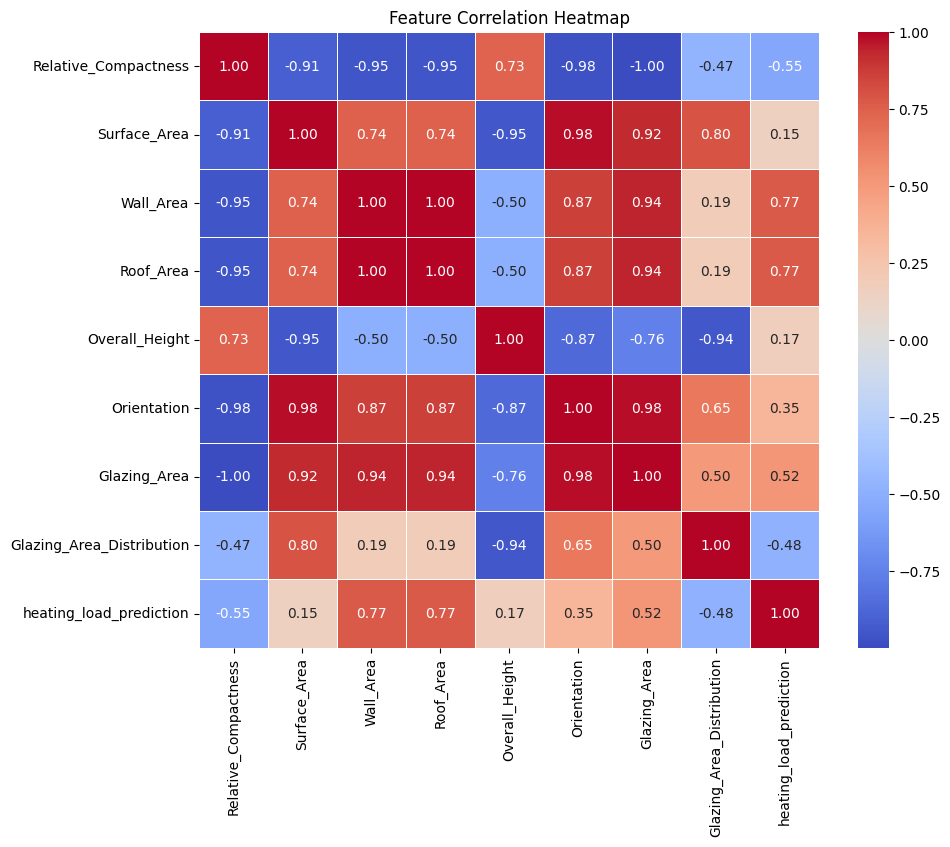

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
corr = df_preds.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()


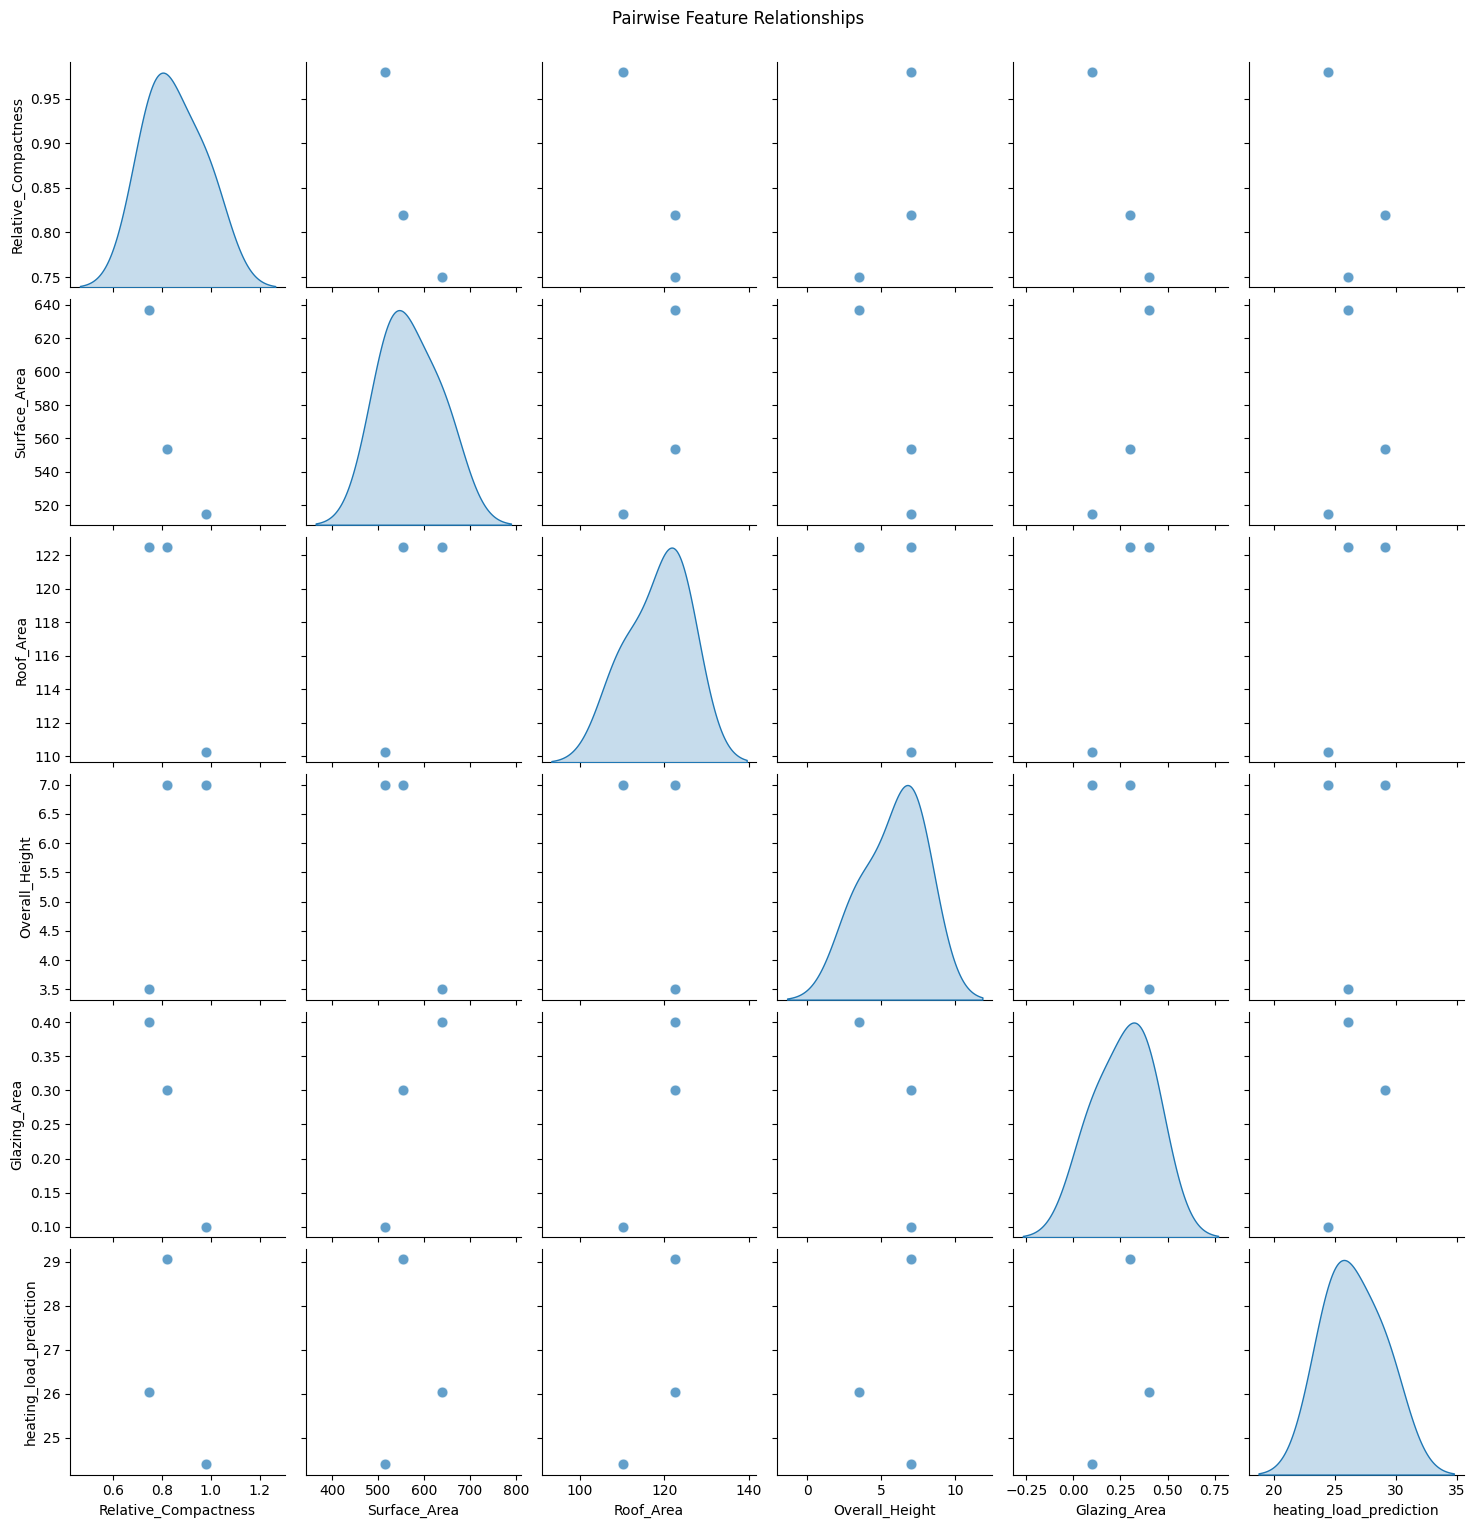

In [8]:
sns.pairplot(
    df_preds,
    vars=[
        "Relative_Compactness",
        "Surface_Area",
        "Roof_Area",
        "Overall_Height",
        "Glazing_Area",
        "heating_load_prediction"
    ],
    diag_kind="kde",
    plot_kws={"alpha": 0.7, "s": 60}
)
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


In [9]:
!pip install shap

In [11]:
import shap
import joblib

# Load the trained model
model = joblib.load("models/regression_model.pkl")

# Prepare data (same features as used in training)
X = df_preds[
    ["Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
     "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution"]
].copy()

X.columns = [f"X{i}" for i in range(1, 9)]

# Create SHAP explainer
explainer = shap.Explainer(model.predict, X)

# Compute SHAP values
shap_values = explainer(X)

# Convert to DataFrame for heatmap plotting
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)


In [12]:
explainer = shap.Explainer(model.predict, X)
shap_values = explainer(X)


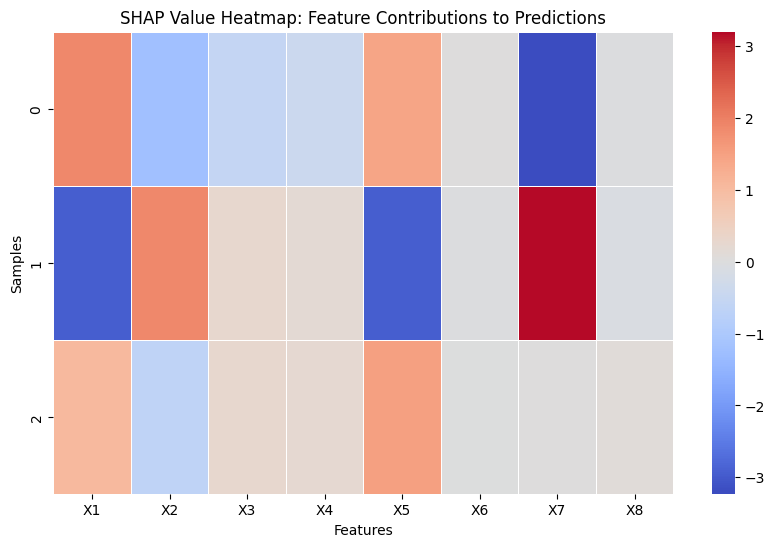

In [13]:
plt.figure(figsize=(10, 6))
sns.heatmap(shap_df, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("SHAP Value Heatmap: Feature Contributions to Predictions")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()


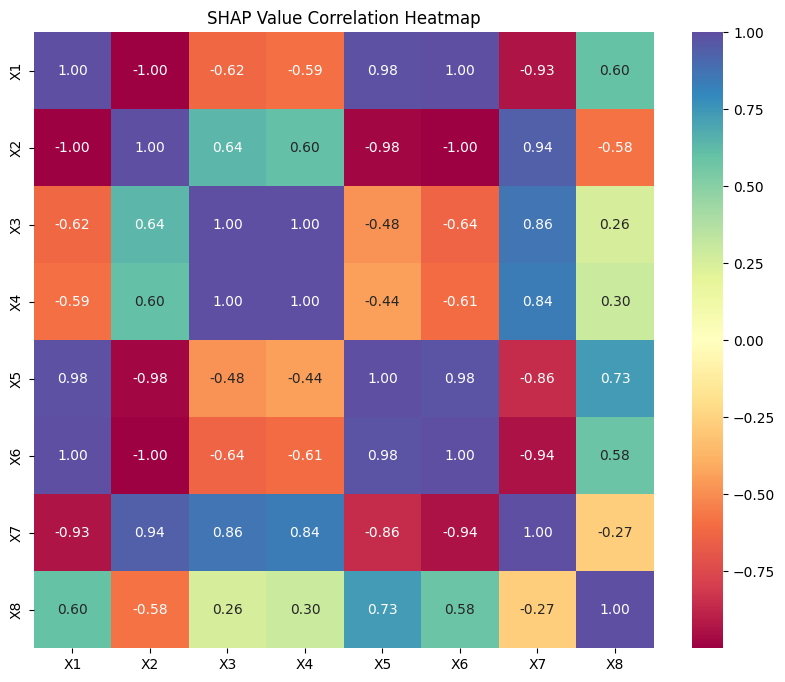

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(shap_df.corr(), annot=True, cmap="Spectral", fmt=".2f")
plt.title("SHAP Value Correlation Heatmap")
plt.show()


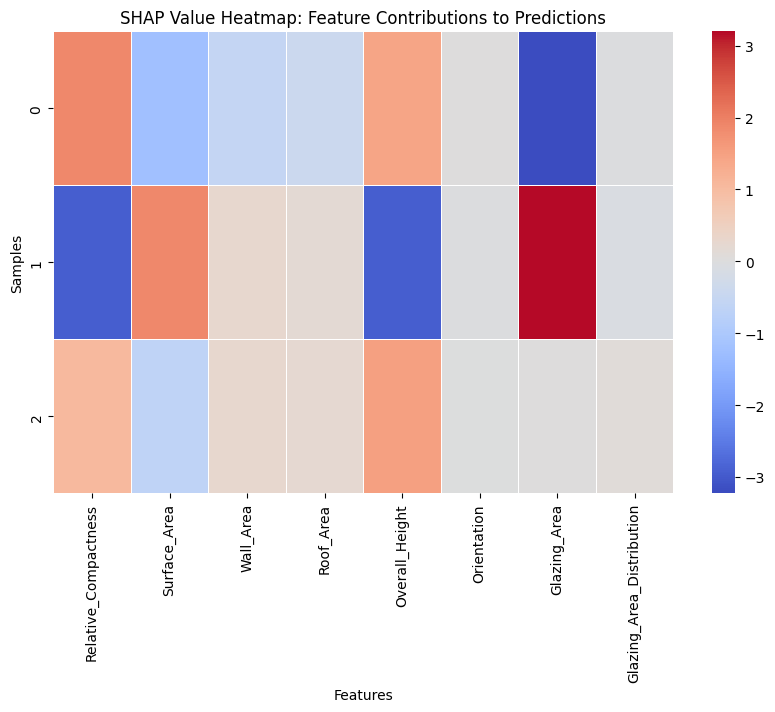

In [15]:
# After computing SHAP values and converting to DataFrame
shap_df = pd.DataFrame(shap_values.values, columns=X.columns)

# ✅ Rename technical column labels to descriptive ones
friendly_names = {
    "X1": "Relative_Compactness",
    "X2": "Surface_Area",
    "X3": "Wall_Area",
    "X4": "Roof_Area",
    "X5": "Overall_Height",
    "X6": "Orientation",
    "X7": "Glazing_Area",
    "X8": "Glazing_Area_Distribution"
}
shap_df.rename(columns=friendly_names, inplace=True)

# 🔥 Now plot the prettified SHAP heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(shap_df, cmap="coolwarm", center=0, linewidths=0.5)
plt.title("SHAP Value Heatmap: Feature Contributions to Predictions")
plt.xlabel("Features")
plt.ylabel("Samples")
plt.show()


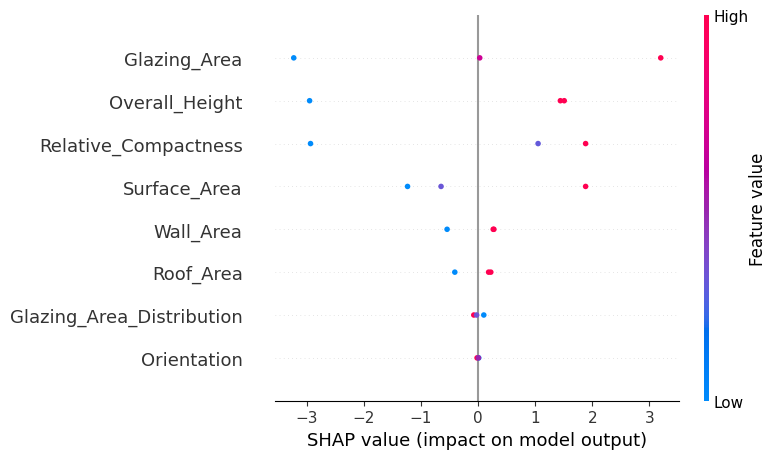

In [17]:
# Required to visualize in notebooks
shap.initjs()

# Create summary beeswarm plot
shap.summary_plot(shap_values.values, features=X, feature_names=[
    "Relative_Compactness", "Surface_Area", "Wall_Area", "Roof_Area",
    "Overall_Height", "Orientation", "Glazing_Area", "Glazing_Area_Distribution"
])